Basic of stat 2

In [28]:
#Confidence Interval.

Estimation And Confidence Intervals

Background




In quality control processes, especially when dealing with high-value items, destructive sampling is a necessary but costly method to ensure product quality. The test to determine whether an item meets the quality standards destroys the item, leading to the requirement of small sample sizes due to cost constraints.



Scenario




A manufacturer of print-heads for personal computers is interested in estimating the mean durability of their print-heads in terms of the number of characters printed before failure. To assess this, the manufacturer conducts a study on a small sample of print-heads due to the destructive nature of the testing process.


Data
A total of 15 print-heads were randomly selected and tested until failure. The durability of each print-head (in millions of characters) was recorded as follows:
1.13, 1.55, 1.43, 0.92, 1.25, 1.36, 1.32, 0.85, 1.07, 1.48, 1.20, 1.33, 1.18, 1.22, 1.29



In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [ ]:
#Data and summary statistics
# -----------------------------
data = [1.13, 1.55, 1.43, 0.92, 1.25,
        1.36, 1.32, 0.85, 1.07, 1.48,
        1.20, 1.33, 1.18, 1.22, 1.29]

In [ ]:

n = len(data) # sample size

In [ ]:
mean = np.mean(data)   # sample mean

In [ ]:
s = np.std(data, ddof=1)   # sample standard deviation (ddof=1 -> sample)

In [ ]:
sigma = 0.2                          # known population SD (for part b)
alpha = 0.01                         # 99% confidence level → α=0.01

In [ ]:
print("Sample size (n):", n)
print("Sample mean:", round(mean, 3))
print("Sample standard deviation (s):", round(s, 3))


Sample size (n): 15
Sample mean: 1.239
Sample standard deviation (s): 0.193


Step 2: 99% CI using sample SD (t-distribution) → Part (a)
a. Build 99% Confidence Interval Using Sample Standard Deviation
Assuming the sample is representative of the population, construct a 99% confidence interval for the mean number of characters printed before the print-head fails using the sample standard deviation. Explain the steps you take and the rationale behind using the t-distribution for this task.


In [ ]:
df = n - 1

In [ ]:
t_value = stats.t.ppf(1 - alpha/2, df)      # critical t-value

In [ ]:
se_t = s / np.sqrt(n)                       # standard error

In [ ]:
margin_t = t_value * se_t                   # margin of error

In [ ]:
ci_t = (mean - margin_t, mean + margin_t)

In [ ]:
print("\n(a) 99% Confidence Interval using sample SD (t-distribution):")
print("CI =", tuple(round(x, 3) for x in ci_t))


(a) 99% Confidence Interval using sample SD (t-distribution):
CI = (np.float64(1.09), np.float64(1.387))


step of avove concept
Part (a) – Using sample SD:

Population SD is unknown, sample size is small → use t-distribution.

Sample mean ≈ 1.239, sample SD ≈ 0.193.

99% CI = (1.090, 1.387) million characters.

Wider interval reflects extra uncertainty from estimating SD.

# Step 3:
99% CI using known σ = 0.2 (z-distribution) → Part (b)
. Build 99% Confidence Interval Using Known Population Standard Deviation
If it were known that the population standard deviation is 0.2 million characters, construct a 99% confidence interval for the mean number of characters printed before failure.


In [ ]:
z_value = stats.norm.ppf(1 - alpha/2)       # critical z-value
se_z = sigma / np.sqrt(n)                   # standard error
margin_z = z_value * se_z
ci_z = (mean - margin_z, mean + margin_z)
print("\n(b) 99% Confidence Interval using known σ=0.2 (z-distribution):")
print("CI =", tuple(round(x, 3) for x in ci_z))




(b) 99% Confidence Interval using known σ=0.2 (z-distribution):
CI = (np.float64(1.106), np.float64(1.372))


Part (b) – Using known population SD:

Population SD σ = 0.2 is known → use z-distribution.

99% CI = (1.106, 1.372) million characters.

Slightly narrower than t-based interval because σ is known.

Interpretation:
We are 99% confident that the true mean durability of print-heads is between 1.09–1.39 million characters (t-based) or 1.11–1.37 million characters (z-based).

 #Step 4: Plot mean and both confidence intervals


In [ ]:

plt.figure(figsize=(7,4))


<Figure size 700x400 with 0 Axes>

<Figure size 700x400 with 0 Axes>

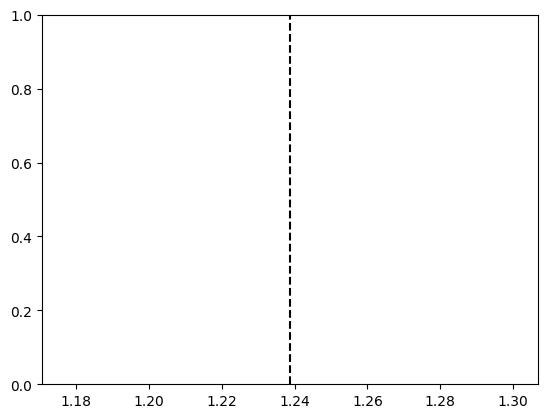

In [ ]:
# Mean line
plt.axvline(mean, color='black', linestyle='--', label=f"Mean = {mean:.3f}")

<ErrorbarContainer object of 3 artists>

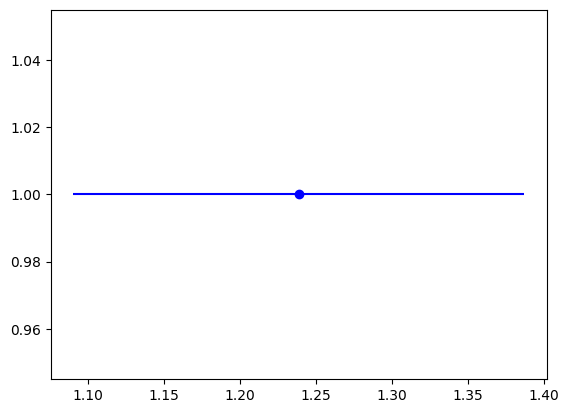

In [ ]:
# CI with t-distribution
plt.errorbar(mean, 1, xerr=[[mean-ci_t[0]], [ci_t[1]-mean]],
             fmt='o', color='blue', label="99% CI (t-based)")


<ErrorbarContainer object of 3 artists>

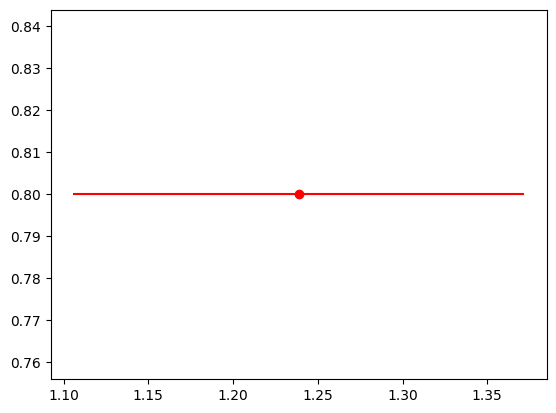

In [ ]:
# CI with z-distribution
plt.errorbar(mean, 0.8, xerr=[[mean-ci_z[0]], [ci_z[1]-mean]],
             fmt='o', color='red', label="99% CI (z-based, σ=0.2)")


/tmp/ipython-input-399554803.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


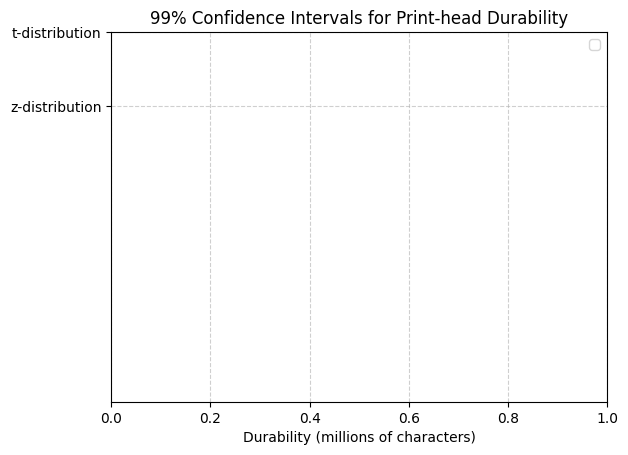

In [ ]:
plt.yticks([1, 0.8], ["t-distribution", "z-distribution"])
plt.xlabel("Durability (millions of characters)")
plt.title("99% Confidence Intervals for Print-head Durability")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Sample mean: ≈ 1.239

Sample SD: ≈ 0.193

(a) Using sample SD (t-distribution, df=14):
👉 CI = (1.090, 1.387)

(b) Using known σ = 0.2 (z-distribution):
👉 CI = (1.106, 1.372)